# Flower Image Classification using Deep NN

### Importing Dependencies

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import tensorflow as tf
from tensorflow import keras
tf.config.experimental.get_device_details(tf.config.experimental.list_physical_devices()[1])

{'compute_capability': (6, 1), 'device_name': 'NVIDIA GeForce GTX 1070'}

### Load Flower Dataset
Dataset URL: https://www.kaggle.com/datasets/kausthubkannan/5-flower-types-classification-dataset

No. of Classes: 5

Classes: Lilly, Lotus, Orchid, Sunflower, Tulip

Total Images: 5000 

In [3]:
num_classes = 5
train_data, val_data = keras.utils.image_dataset_from_directory('flower_images', batch_size=32, image_size=(256, 256), validation_split=0.2, subset='both', label_mode='categorical', seed=115)

Found 4999 files belonging to 5 classes.
Using 4000 files for training.
Using 999 files for validation.


### Model Definition

In [19]:
input = keras.Input(shape=(256, 256, 3))

x = keras.layers.RandomFlip(mode='horizontal')(input)
x1 = keras.layers.RandomRotation(factor=0.2)(x)

x = keras.layers.Rescaling(scale=1/256)(x)

x = keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x1)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = keras.layers.MaxPooling2D()(x)
x = keras.layers.Flatten()(x)

xp = keras.layers.Flatten()(x1)
xp = keras.layers.Dense(64, activation='relu')(xp)
xp = keras.layers.Dense(128, activation='relu')(xp)
xp = keras.layers.Dense(256, activation='relu')(xp)
x = keras.layers.Concatenate()([xp, x])
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(64, activation='relu')(x)
x = keras.layers.Dense(32, activation='relu')(x)

output = keras.layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(input, output)

In [20]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 random_flip_3 (RandomFlip)     (None, 256, 256, 3)  0           ['input_4[0][0]']                
                                                                                                  
 random_rotation_2 (RandomRotat  (None, 256, 256, 3)  0          ['random_flip_3[0][0]']          
 ion)                                                                                             
                                                                                            

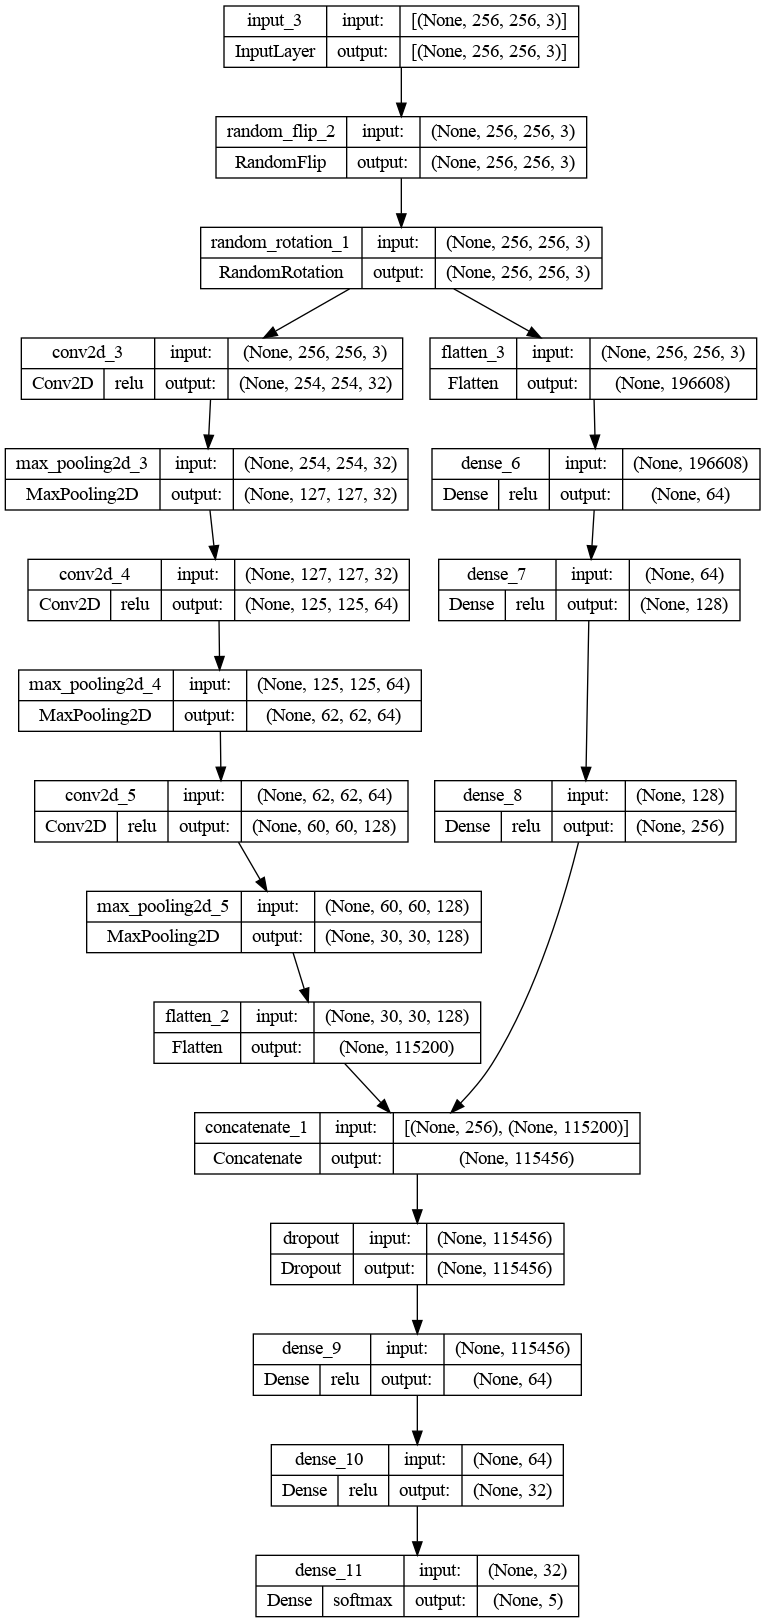

In [10]:
keras.utils.plot_model(model, to_file='nn_model.png', show_layer_activations=True, show_shapes=True)

### Model Training

In [21]:
model.build(input_shape=(256, 256, 3))
model.compile(loss=keras.losses.CategoricalCrossentropy(), 
            optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
            metrics=["accuracy"])

In [22]:
def custom_lr(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:
        return lr / 10
    else:
        return lr

In [23]:
history = model.fit(train_data, batch_size=32, validation_data=val_data, epochs=100, callbacks=[keras.callbacks.TensorBoard(), keras.callbacks.LearningRateScheduler(custom_lr), keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=15)], verbose=0)

### Plotting Accuracy and Loss

In [24]:
import seaborn as sb

<AxesSubplot: >

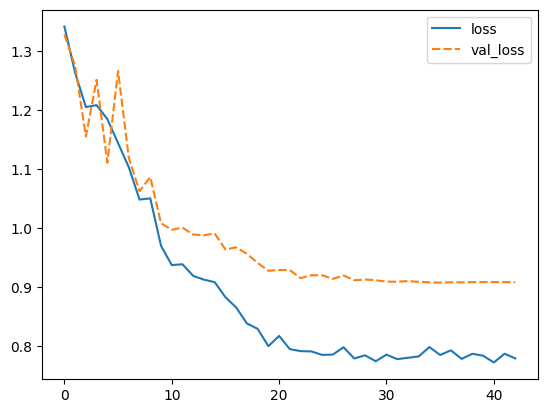

In [27]:
sb.lineplot(data={'loss' : history.history['loss'][1:], 'val_loss' : history.history['val_loss'][1:]})

<AxesSubplot: >

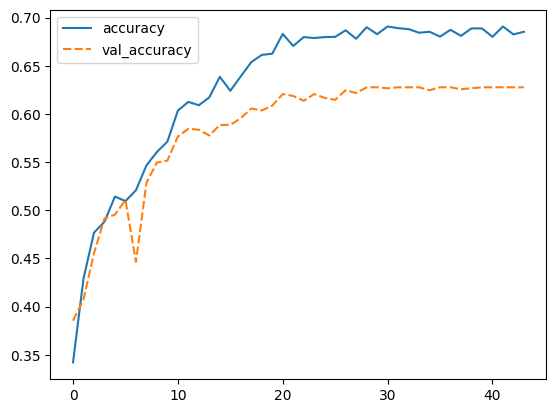

In [28]:
sb.lineplot(data={'accuracy' : history.history['accuracy'], 'val_accuracy' : history.history['val_accuracy']})